# Directionality analysis

This is an example of a directionality analysis using .TFBS from motif sites.

In [1]:
#Modules needed for this notebook
import seaborn as sns
import tfcomb.objects

## Create CombObj and fill it with .TFBS from motif scanning

In [2]:
C = tfcomb.objects.CombObj()

In [3]:
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4.fa.gz", 
                   threads=8)

INFO: Scanning for TFBS with 8 thread(s)...
INFO: Progress: 6%
INFO: Progress: 12%
INFO: Progress: 19%
INFO: Progress: 38%
INFO: Progress: 50%
INFO: Progress: 56%
INFO: Progress: 62%
INFO: Finished!
INFO: Formatting scanned TFBS
INFO: Identified 945192 TFBS (401 unique names) within given regions


For this analysis, we will run count_within() with directional and stranded options turned on:

In [4]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 32%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [5]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP2(-)-SP2(-),SP2(-),SP2(-),1532,3000,3000,0.510667,115.584190
SP2(-)-SP1(-),SP2(-),SP1(-),1292,3000,2610,0.461723,100.270455
SP1(-)-SP2(-),SP1(-),SP2(-),1283,2610,3000,0.458507,90.900653
SP3(-)-SP2(-),SP3(-),SP2(-),1279,2699,3000,0.449478,99.665522
SP2(+)-SP2(+),SP2(+),SP2(+),1326,2976,2976,0.445565,96.094473
...,...,...,...,...,...,...,...
MBD2(+)-PRDM6(-),MBD2(+),PRDM6(-),1,451,3595,0.000785,-5.325049
ZNF8(-)-SP2(+),ZNF8(-),SP2(+),1,565,2976,0.000771,-5.148290
SP1(-)-MEIS1(+),SP1(-),MEIS1(+),1,2610,672,0.000755,-4.731727
NFE2L1(-)-SP2(-),NFE2L1(-),SP2(-),1,616,3000,0.000736,-5.367950


## Analyze preferential directionality of motifs

First, we create a directionality analysis for the rules found:

In [6]:
df = tfcomb.analysis.directionality(C.rules)

The output dataframe contains the fraction of the TF1-TF2-counts which fall into each of the four scenarios, as well as a p-value of significance:

In [7]:
df.head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
45791,PAX5,ZNF770,2520,0.309524,0.574206,0.059524,0.056746,0.246496,0.000000e+00
77860,ZNF770,ZNF121,2334,0.601542,0.323907,0.044559,0.029991,0.270588,0.000000e+00
6486,ZNF121,FOXJ3,916,0.080786,0.051310,0.783843,0.084061,0.356200,4.274542e-302
34029,FOXJ3,PAX5,799,0.041302,0.065081,0.812265,0.081352,0.375204,2.323690e-292
72784,ZNF770,FOXJ3,1457,0.079616,0.064516,0.610158,0.245710,0.253750,9.298170e-244
67653,ZNF121,ZFP28,901,0.107658,0.061043,0.718091,0.113208,0.312936,3.142560e-229
27230,ZFP28,PAX5,816,0.058824,0.089461,0.726716,0.125000,0.318959,1.209051e-215
67696,ZNF121,IKZF1,869,0.247411,0.677791,0.047181,0.027618,0.301994,7.524407e-206
4136,PATZ1,PATZ1,6122,0.345802,0.345802,0.157138,0.151258,0.110649,1.176928e-194
49038,PAX5,IKZF1,814,0.233415,0.684275,0.040541,0.041769,0.303372,1.463967e-194


We can subset these on pvalue and number of sites

In [8]:
selected = df[(df["pvalue"] < 0.01) & (df["TF1_TF2_count"] > 50)]

In [9]:
#Number of TF pairs with significant differences in directionality
selected.shape[0]

13584

## Visualize different preferences for directionality

These preferences for directionality can be visualized with seaborn.clustermap as seen here:

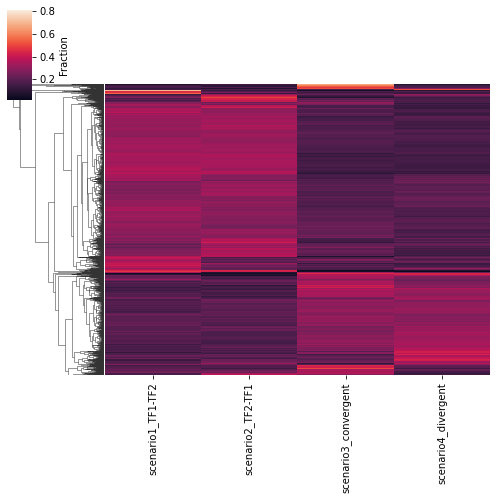

In [10]:
g = sns.clustermap(selected[["scenario1_TF1-TF2", "scenario2_TF2-TF1", "scenario3_convergent", "scenario4_divergent"]],
                        col_cluster=False,
                        yticklabels=False,
                        cbar_kws={'label': "Fraction"},
                        figsize=(7,7))

## In-depth look at preferential directionality

By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.

### TFs specific in TF1-TF2 orientation

In [11]:
selected.sort_values("scenario1_TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
46306,PAX5,NR2E3,442,0.739819,0.115385,0.085973,0.058824,0.327362,7.111612e-123
45404,THRA,GRHL2,153,0.725490,0.091503,0.091503,0.091503,0.316993,9.456378e-40
6212,ESRRG,PAX5,146,0.712329,0.143836,0.089041,0.054795,0.310393,2.316889e-36
18883,ZNF121,NR2E3,470,0.704255,0.140426,0.093617,0.061702,0.304558,4.608684e-113
9707,ESRRG,GRHL2,81,0.703704,0.135802,0.061728,0.098765,0.303977,2.400667e-19
39183,CEBPD,ZNF121,145,0.703448,0.117241,0.082759,0.096552,0.302631,2.520827e-34
33459,RXRB,ZNF121,281,0.693950,0.131673,0.067616,0.106762,0.297139,3.100740e-64
48670,PAX5,GATA3,256,0.664062,0.144531,0.125000,0.066406,0.278031,3.356424e-51
12997,NR6A1,ZNF121,246,0.662602,0.154472,0.089431,0.093496,0.276672,1.029574e-48
10464,ZNF121,STAT2,987,0.656535,0.141844,0.130699,0.070922,0.272806,9.251945e-191


### TFs specific in TF2-TF2 orientation

In [12]:
selected.sort_values("scenario2_TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
40984,GRHL2,RXRB,146,0.095890,0.746575,0.116438,0.041096,0.332574,9.307835e-42
77006,IRF2,HINFP,58,0.103448,0.724138,0.120690,0.051724,0.317447,3.987705e-15
5245,ZNF394,PAX5,573,0.109948,0.722513,0.101222,0.066318,0.315572,4.249058e-148
14106,IRF1,HINFP,64,0.093750,0.718750,0.109375,0.078125,0.312760,3.406556e-16
2436,ZNF121,ESRRG,188,0.138298,0.712766,0.085106,0.063830,0.310096,9.225789e-47
68534,PAX5,CEBPD,134,0.134328,0.708955,0.097015,0.059701,0.307483,9.613263e-33
38509,ZNF394,ZNF121,658,0.098784,0.696049,0.120061,0.085106,0.297713,2.264611e-151
32154,PAX5,NR6A1,203,0.123153,0.689655,0.098522,0.088670,0.293462,3.235655e-45
76553,NKX2-1,FOXJ3,616,0.110390,0.685065,0.079545,0.125000,0.290661,4.903885e-135
49038,PAX5,IKZF1,814,0.233415,0.684275,0.040541,0.041769,0.303372,1.463967e-194


### TFs specific in convergent orientation

In [13]:
selected.sort_values("scenario3_convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
34029,FOXJ3,PAX5,799,0.041302,0.065081,0.812265,0.081352,0.375204,2.323690e-292
6486,ZNF121,FOXJ3,916,0.080786,0.051310,0.783843,0.084061,0.356200,4.274542e-302
51383,ZNF121,AR,610,0.068852,0.057377,0.773770,0.100000,0.349644,1.142532e-193
11027,AR,PAX5,565,0.058407,0.056637,0.773451,0.111504,0.349895,1.314193e-179
45296,ZNF121,SRY,625,0.076800,0.048000,0.760000,0.115200,0.341113,7.449310e-189
36840,SRY,PAX5,610,0.063934,0.068852,0.759016,0.108197,0.339922,5.037777e-183
54563,ZNF121,MEF2B,625,0.072000,0.052800,0.756800,0.118400,0.338987,1.673521e-186
3793,ZNF354A,PAX5,554,0.043321,0.099278,0.752708,0.104693,0.336285,1.225112e-162
46063,MEF2B,PAX5,594,0.052189,0.074074,0.750842,0.122896,0.335200,2.766906e-173
23011,MEF2A,PAX5,628,0.060510,0.073248,0.750000,0.116242,0.334185,4.074009e-182


### TFs specific in divergent orientation

In [14]:
selected.sort_values("scenario4_divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
28516,NKX2-1,ZNF121,520,0.119231,0.086538,0.073077,0.721154,0.314700,1.271967e-133
29485,CEBPB,PAX5,122,0.065574,0.081967,0.139344,0.713115,0.310359,2.281927e-30
75222,CEBPB,ZNF121,133,0.097744,0.067669,0.142857,0.691729,0.296103,3.908864e-30
22702,MAF,PAX5,424,0.113208,0.087264,0.110849,0.688679,0.292687,3.759181e-94
5457,PAX5,CEBPE,64,0.093750,0.031250,0.187500,0.687500,0.298651,8.941411e-15
25369,MAF,ZNF121,438,0.091324,0.100457,0.121005,0.687215,0.291741,1.221988e-96
22052,CEBPA,ZNF121,146,0.095890,0.109589,0.123288,0.671233,0.281045,8.432934e-30
12841,CEBPA,PAX5,133,0.060150,0.142857,0.150376,0.646617,0.267552,1.336451e-24
22898,SRY,HINFP,54,0.111111,0.074074,0.185185,0.629630,0.257267,2.598377e-09
35603,ZNF121,ZNF324,525,0.049524,0.047619,0.274286,0.628571,0.273895,4.102182e-102
